機械学習特論 第6回 アダブースト で mnist を分類

In [1]:
# google colab で実行する場合は、次の行の先頭の # を削除してこのブロックを実行する
#!pip install japanize-matplotlib

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics

In [3]:
from sklearn.datasets import fetch_openml
# 手書き文字のデータセットをダウンロードして、実験用データを準備 (70000枚のうち7000枚を利用)
mnist_data = fetch_openml('mnist_784', version=1)
_x = np.array(mnist_data['data'].astype(np.float32))
_y = np.array(mnist_data['target'].astype(np.int32))
_, x, _, y = train_test_split(_x, _y, test_size=0.1, random_state=1)

In [4]:
# データを学習用と検証用に分割
x_train, x_test, y_train, y_test = \
    train_test_split(x, y, test_size=0.25, random_state=2) # 検証用データに25%を割当て
print(f'x_train:{len(x_train)} x_test:{len(x_test)} y_train:{len(y_train)} y_test:{len(y_test)}')

x_train:5250 x_test:1750 y_train:5250 y_test:1750


In [5]:
# アダブーストのためのベースモデル(決定木)を作成 (指定がないと深さ1の決定木を利用)
base_clf = DecisionTreeClassifier(max_depth=5, random_state=1)
# 学習データを利用してアダブーストを学習
clf = AdaBoostClassifier(base_estimator=base_clf, # ベースモデルを指定
                         random_state=1) # 乱数シード
clf = clf.fit(x_train, y_train)

# 学習したモデルの性能(正答率)を学習用データと検証用データで評価
predict_train = clf.predict(x_train)
predict_test = clf.predict(x_test)
print('max_depth=10, accuracy_score: ', 
      f'train data : {metrics.accuracy_score(y_train, predict_train): 0.5}', 
      f'test data : {metrics.accuracy_score(y_test, predict_test): 0.5}')

max_depth=10, accuracy_score:  train data :  0.92705 test data :  0.78286


In [9]:
# 木の数を変えて学習したアダブーストの性能を学習用データと検証用データで確認
N = 20
_x = np.linspace(10, N*10, N) # グラフのx軸の設定 (1から7までの7点)
dct_train_score = [] # グラフ用のリスト
dct_test_score = []
adb_train_score = [] # グラフ用のリスト
adb_test_score = [] 
for i in range(N):
    # 学習データを利用してアダブーストを学習
    base_clf = DecisionTreeClassifier(max_depth=5, random_state=1)
    clf = AdaBoostClassifier(base_estimator=base_clf, # ベースモデルを指定
                             n_estimators=(i+1)*10, # 木の数は10ずつ増やして性能を計測
                             random_state=1) # 乱数シード
    clf = clf.fit(x_train, y_train)  # * y_trainの列指定はwarning回避のため *

    # 学習したモデルの性能(正答率)を学習用データと検証用データで評価
    predict_train = clf.predict(x_train)
    adb_train_score.append(metrics.accuracy_score(y_train, predict_train))
    predict_test = clf.predict(x_test)
    adb_test_score.append(metrics.accuracy_score(y_test, predict_test))
    print(f'ADB max_depth={i+1}*10, accuracy_score: ', 
            f'train data : {adb_train_score[i]: 0.5}', 
            f'test data : {adb_test_score[i]: 0.5}')

ADB max_depth=1*10, accuracy_score:  train data :  0.79086 test data :  0.68629
ADB max_depth=2*10, accuracy_score:  train data :  0.85771 test data :  0.74
ADB max_depth=3*10, accuracy_score:  train data :  0.89105 test data :  0.75771
ADB max_depth=4*10, accuracy_score:  train data :  0.90095 test data :  0.764
ADB max_depth=5*10, accuracy_score:  train data :  0.92705 test data :  0.78286
ADB max_depth=6*10, accuracy_score:  train data :  0.93181 test data :  0.78686
ADB max_depth=7*10, accuracy_score:  train data :  0.93981 test data :  0.79086
ADB max_depth=8*10, accuracy_score:  train data :  0.9419 test data :  0.80057
ADB max_depth=9*10, accuracy_score:  train data :  0.95219 test data :  0.80743
ADB max_depth=10*10, accuracy_score:  train data :  0.95371 test data :  0.82343
ADB max_depth=11*10, accuracy_score:  train data :  0.95638 test data :  0.82629
ADB max_depth=12*10, accuracy_score:  train data :  0.96038 test data :  0.82857
ADB max_depth=13*10, accuracy_score:  train

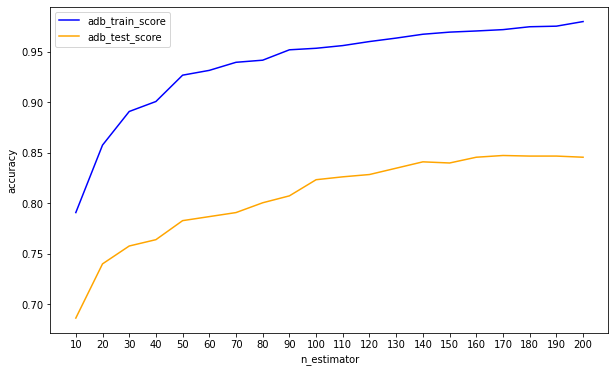

In [8]:
# 木の深さに対する決定木の性能をグラフで表示
plt.figure(figsize=[10,6])
plt.plot(_x, adb_train_score, label='adb_train_score', color="blue")
plt.plot(_x, adb_test_score, label='adb_test_score', color="orange")
plt.xlabel('n_estimator')
plt.ylabel('accuracy')
plt.xticks(_x)
plt.legend()
plt.show()

In [10]:
# 木の数を変えて学習したアダブーストの性能を学習用データと検証用データで確認
N = 20
_x = np.linspace(10, N*10, N) # グラフのx軸の設定 (1から7までの7点)
dct_train_score = [] # グラフ用のリスト
dct_test_score = []
adb_train_score = [] # グラフ用のリスト
adb_test_score = [] 
for i in range(N):
    # 学習データを利用してアダブーストを学習
    base_clf = DecisionTreeClassifier(max_depth=10, random_state=1)
    clf = AdaBoostClassifier(base_estimator=base_clf, # ベースモデルを指定
                             n_estimators=(i+1)*10, # 木の数は10ずつ増やして性能を計測
                             random_state=1) # 乱数シード
    clf = clf.fit(x_train, y_train)  # * y_trainの列指定はwarning回避のため *

    # 学習したモデルの性能(正答率)を学習用データと検証用データで評価
    predict_train = clf.predict(x_train)
    adb_train_score.append(metrics.accuracy_score(y_train, predict_train))
    predict_test = clf.predict(x_test)
    adb_test_score.append(metrics.accuracy_score(y_test, predict_test))
    print(f'ADB max_depth={i+1}*10, accuracy_score: ', 
            f'train data : {adb_train_score[i]: 0.5}', 
            f'test data : {adb_test_score[i]: 0.5}')

ADB max_depth=1*10, accuracy_score:  train data :  1.0 test data :  0.83886
ADB max_depth=2*10, accuracy_score:  train data :  1.0 test data :  0.87429
ADB max_depth=3*10, accuracy_score:  train data :  1.0 test data :  0.88686
ADB max_depth=4*10, accuracy_score:  train data :  1.0 test data :  0.90114
ADB max_depth=5*10, accuracy_score:  train data :  1.0 test data :  0.90571
ADB max_depth=6*10, accuracy_score:  train data :  1.0 test data :  0.91143
ADB max_depth=7*10, accuracy_score:  train data :  1.0 test data :  0.91371
ADB max_depth=8*10, accuracy_score:  train data :  1.0 test data :  0.912
ADB max_depth=9*10, accuracy_score:  train data :  1.0 test data :  0.91029
ADB max_depth=10*10, accuracy_score:  train data :  1.0 test data :  0.91086
ADB max_depth=11*10, accuracy_score:  train data :  1.0 test data :  0.91257
ADB max_depth=12*10, accuracy_score:  train data :  1.0 test data :  0.91486
ADB max_depth=13*10, accuracy_score:  train data :  1.0 test data :  0.916
ADB max_dept

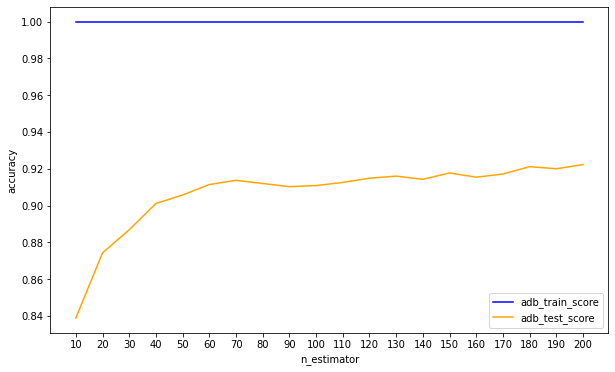

In [11]:
# 木の深さに対する決定木の性能をグラフで表示
plt.figure(figsize=[10,6])
plt.plot(_x, adb_train_score, label='adb_train_score', color="blue")
plt.plot(_x, adb_test_score, label='adb_test_score', color="orange")
plt.xlabel('n_estimator')
plt.ylabel('accuracy')
plt.xticks(_x)
plt.legend()
plt.show()